Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

Dataset from kaggle - credit card customer chur prediction  
(https://www.kaggle.com/datasets/rjmanoj/credit-card-customer-churn-prediction?select=Churn_Modelling.csv)

It is the data of the bank, which have some (10000 rows) data of their customers.  
This data shows that, whether a person is still a customer of bank or not.

Reading the dataset

In [2]:
df = pd.read_csv("C:/Users/Hp/Downloads/Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


RowNumber => no. of rows (1-10,000).  
CustomerId => Unique ID of a customer.  
Surname => surname of a customer.  
CreditScore => customer's credit score by the bank.  
Geography => Customer from which country: (France, German, Spain).  
Gender => Male or Female.  
Age => Age of the customer.  
Tenure => How many years he/she is a customer of the bank.  
Balance => Account balance.  
NumOfProducts => How many product of a bank, customer is using. Eg: credit card, debit card, FD, mutual funds, etc.  
HasCrCard => "1" - have credit card, "0" - not have credit card.  
IsActiveMember => "1" - Yes, "0" - No.  
EstimatedSalary => Customer's estimated salary by bank.  
Exited => "1" - Customer left the bank, "0" - Customer not left the bank.  

Have to predict "Exited"

Checking the type of columns, whether have "null" values or not, contain duplicates or not 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.duplicated().sum()

0

Will find the count of Exited ("0" & "1")

In [6]:
pd.crosstab(index= df["Exited"], columns="count")    # 1=> left the bank 

col_0,count
Exited,
0,7963
1,2037


Finding the categories in "Geography" column.

In [7]:
pd.crosstab(index= df["Geography"], columns="count")

col_0,count
Geography,
France,5014
Germany,2509
Spain,2477


In [8]:
pd.crosstab(index= df["Gender"], columns="count")

col_0,count
Gender,
Female,4543
Male,5457


Now, will drop the unwanted columns/features from the dataset.

In [9]:
df.drop(columns= ["RowNumber", "CustomerId", "Surname"], inplace= True)

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df = pd.get_dummies(df,columns=["Geography","Gender"], drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


We got the last three columns, in form of "True" and "False".  
Will replace the value to "1" and "0".

In [12]:
df.replace({False: 0, True:1}, inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


Now, will split the dataset into "Independent" and "Dependent" variables.
Then spliting those in training and testing.

In [13]:
x= df.drop(columns=['Exited'])
y= df["Exited"]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [14]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Now, will standardize the dataset.

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scale = scaler.fit_transform(x_train)
x_test_scale = scaler.fit_transform(x_test)

As, I added 3 "hidden layers" and "output layer" of 1 node.

We will use activation = "relu" for "hidden Layer", as it is the best activation function.

In [17]:
model = Sequential()

model.add(Dense(11,activation= "relu", input_dim = 11))
model.add(Dense(11,activation= "relu"))
model.add(Dense(11,activation= "relu"))
model.add(Dense(1, activation="sigmoid"))

we will see the summary and total paraments of the ANN model.

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11)                132       
                                                                 
 dense_1 (Dense)             (None, 11)                132       
                                                                 
 dense_2 (Dense)             (None, 11)                132       
                                                                 
 dense_3 (Dense)             (None, 1)                 12        
                                                                 
Total params: 408 (1.59 KB)
Trainable params: 408 (1.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


We will compile model, and "loss fuction = binary_crossentropy" , because there is only 1 node in "output layer". And optimizer is Adam (it is best optimizer)

In [19]:
model.compile(loss="binary_crossentropy", optimizer="Adam", metrics=["accuracy"])

In [20]:
history = model.fit(x_train_scale, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 3s 6ms/step - loss: 0.5512 - accuracy: 0.7561 - val_loss: 0.4784 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4601 - accuracy: 0.7977 - val_loss: 0.4447 - val_accuracy: 0.7994
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4341 - accuracy: 0.8100 - val_loss: 0.4264 - val_accuracy: 0.8106
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4161 - accuracy: 0.8238 - val_loss: 0.4096 - val_accuracy: 0.8163
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3997 - accuracy: 0.8386 - val_loss: 0.3924 - val_accuracy: 0.8275
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3835 - accuracy: 0.8461 - val_loss: 0.3780 - val_accuracy: 0.8338
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3721 - accuracy: 0.8505 - val_loss: 0.3695 - val_accuracy: 0.8363

In [21]:
model.layers[0].get_weights()

[array([[ 0.17006713,  0.07305063,  0.02408972,  0.03588402,  0.04859005,
          0.01368174,  0.3422188 , -0.35886708,  0.20063777,  0.20517582,
          0.22129238],
        [-0.99208057,  0.954555  ,  0.8672759 , -0.05142382, -0.3878457 ,
          0.55397415, -0.29770836,  0.3297203 , -0.14678644, -0.06590392,
         -0.28695056],
        [-0.0349143 , -0.27753228,  0.15521407,  0.09848774, -0.04736824,
         -0.35584432, -0.17625776,  0.5227379 ,  0.43145016, -0.09865689,
          0.35355437],
        [ 0.06888102, -0.1822133 , -0.14412181,  0.33936116, -0.12435421,
          0.16964151, -0.05260094, -0.15576339, -0.5272661 ,  0.5095255 ,
          0.17997558],
        [ 0.1850461 , -0.17606919, -0.15035233,  1.2123721 ,  0.602676  ,
         -0.07786585,  0.6250982 ,  0.61129296, -0.33198732, -0.49563852,
          0.59543884],
        [-0.423536  , -0.25282598, -0.064225  , -0.09850042,  0.612921  ,
          0.7217561 , -0.68581885, -0.3723785 , -0.07745332, -0.3111273

In [22]:
model.layers[1].get_weights()

[array([[ 0.18148752, -1.033399  , -0.5357678 , -0.59909505,  0.5264856 ,
         -0.20046046,  0.40127844, -0.004297  , -0.2634255 ,  0.2076321 ,
          0.26934755],
        [ 0.03683404,  0.2598769 ,  0.21870357, -0.30640623,  0.46042788,
          0.43613806, -0.3840116 ,  0.53029484, -0.56405133,  0.14384602,
         -0.26821032],
        [ 0.78944826, -0.91156405, -0.6464334 , -0.8808643 ,  0.02090265,
         -0.24081774,  0.5696189 , -0.03686269, -0.7573128 , -0.88116026,
         -0.18422204],
        [-0.5706477 ,  0.53008676,  0.81443447,  0.43008092,  0.40508643,
         -0.16132331,  0.43901658, -0.9967197 , -0.373037  , -0.5045328 ,
         -0.43001646],
        [-0.09922662, -0.38378546, -0.10252696, -1.2361767 , -0.04579131,
          0.29344591, -0.09166684, -0.45791999,  0.15132451,  0.4863832 ,
          0.4389861 ],
        [ 0.3702591 ,  0.20474726,  0.5046731 , -0.30046868,  0.7068296 ,
         -1.304817  , -0.15707478, -0.11820765,  0.3345098 , -0.2339950

Now, will do prediction. 

In [23]:
y_log = model.predict(x_test_scale)
y_log

63/63 [==============================] - 0s 3ms/step


array([[0.02180205],
       [0.07258695],
       [0.07843687],
       ...,
       [0.01914144],
       [0.03252801],
       [0.4368194 ]], dtype=float32)

As we are getting fuzzy set.  
So will just convert into crip set.  

If the value is more than "0.5" then give as "1", else "0".

In [24]:
y_pred = np.where(y_log>0.5,1,0)

In [25]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Now will check the accuracy of our model.

In [26]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test,y_pred)
acc

0.8615

In [27]:
history

In [28]:
history.history

{'loss': [0.5512316226959229,
  0.4600677192211151,
  0.4340943992137909,
  0.4160901606082916,
  0.3996746838092804,
  0.383517861366272,
  0.37205439805984497,
  0.3640340566635132,
  0.3589506149291992,
  0.3541862964630127,
  0.3534277677536011,
  0.34999769926071167,
  0.3480936288833618,
  0.3477024734020233,
  0.3457096219062805,
  0.34562891721725464,
  0.3442859947681427,
  0.3441251516342163,
  0.3434125483036041,
  0.3416115641593933,
  0.34201154112815857,
  0.3403280973434448,
  0.34026312828063965,
  0.3389245271682739,
  0.3382652997970581,
  0.3375645875930786,
  0.3376680314540863,
  0.33654701709747314,
  0.3361963629722595,
  0.33539286255836487,
  0.3343755006790161,
  0.33362990617752075,
  0.3333212733268738,
  0.3334033191204071,
  0.3327917754650116,
  0.33186405897140503,
  0.3320285677909851,
  0.3309573829174042,
  0.3318346440792084,
  0.32997626066207886,
  0.3299393951892853,
  0.3294473886489868,
  0.32925355434417725,
  0.3289870321750641,
  0.3282610177

We will plot 2 graph.  
1. For loss.  
2. For accuracy.

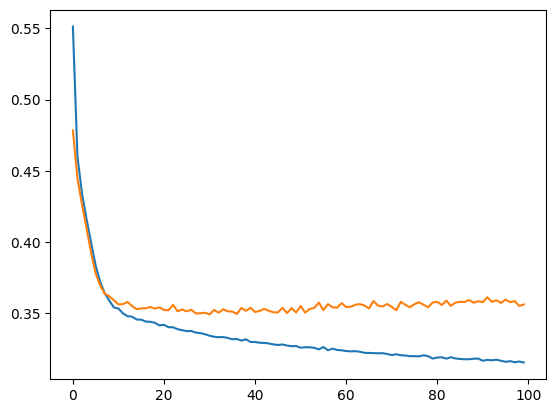

In [29]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

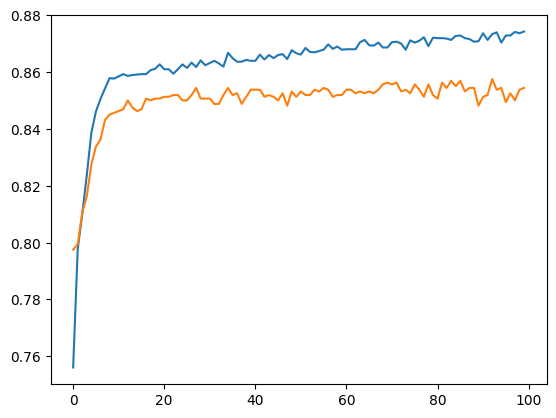

In [30]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])